In [290]:
# helper functions to detect and remove outlier for the specified columns (used later on)
detect_outlier <- function(x) {
    Quantile1 <- quantile(x, probs=.25)
    Quantile3 <- quantile(x, probs=.75)
    IQR = Quantile3-Quantile1
    x > Quantile3 + (IQR*1.5) | x < Quantile1 - (IQR*1.5)
}
 
remove_outlier <- function(dataframe,col,log=F) {
        x <- dataframe
        if (log==F){
                dataframe <- dataframe[!detect_outlier(dataframe[[col]]), ]
        }else{
            dataframe <- dataframe[!detect_outlier(log(dataframe[[col]])), ]
        }
}

# 1 Importing of Data and Simple Statistics and Removing NULL values

In [291]:
# if want to look at other airbnb data can just change the data_source
data_source <- "london_weekdays.csv"
data1 <- read.csv(paste("airbnb/",data_source, sep=""))

In [292]:
# summary of data
summary(data1)

       X           realSum                   room_type    room_shared 
 Min.   :   0   Min.   :   64.68   Entire home/apt:1966   False:4591  
 1st Qu.:1153   1st Qu.:  167.46   Private room   :2625   True :  23  
 Median :2306   Median :  256.36   Shared room    :  23               
 Mean   :2306   Mean   :  360.23                                      
 3rd Qu.:3460   3rd Qu.:  435.45                                      
 Max.   :4613   Max.   :15499.89                                      
 room_private person_capacity host_is_superhost     multi       
 False:1989   Min.   :2.000   False:3936        Min.   :0.0000  
 True :2625   1st Qu.:2.000   True : 678        1st Qu.:0.0000  
              Median :2.000                     Median :0.0000  
              Mean   :2.832                     Mean   :0.2694  
              3rd Qu.:4.000                     3rd Qu.:1.0000  
              Max.   :6.000                     Max.   :1.0000  
      biz         cleanliness_rating guest_satis

In [293]:
# structure of data

In [294]:
# structure of data
str(data1)

'data.frame':	4614 obs. of  20 variables:
 $ X                         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ realSum                   : num  570 298 337 227 256 ...
 $ room_type                 : Factor w/ 3 levels "Entire home/apt",..: 1 2 2 2 2 2 2 2 2 1 ...
 $ room_shared               : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ room_private              : Factor w/ 2 levels "False","True": 1 2 2 2 2 2 2 2 2 1 ...
 $ person_capacity           : num  2 2 2 2 3 2 2 2 4 3 ...
 $ host_is_superhost         : Factor w/ 2 levels "False","True": 1 2 1 2 1 1 1 1 1 1 ...
 $ multi                     : int  0 1 1 1 0 0 0 1 1 0 ...
 $ biz                       : int  0 0 0 0 0 0 0 0 0 1 ...
 $ cleanliness_rating        : num  10 10 10 10 9 10 10 10 9 8 ...
 $ guest_satisfaction_overall: num  98 99 96 99 98 100 100 95 93 74 ...
 $ bedrooms                  : int  1 1 1 1 1 1 1 1 1 0 ...
 $ dist                      : num  5.3 2.2 2.32 5.71 3.26 ...
 $ metro_dist                :

In [295]:
# check for na values within the dataframe
has_na = F
for (i in colnames(data1)){
    if (any(is.na(data1[,i]))){
        print(paste("NA values present in ", i))
        has_na = T
    }
}
if (has_na == F){
    print("NA not present in dataframe")
}


[1] "NA not present in dataframe"


# 2 Description And Cleaning of Dataset For Main Variables of Interest, realSum and guest_satisfaction_overall
In this section, we shall look into the data in more detail. Each variable is investigated
individually to look for possible outliers, and/or to perform a transformation to avoid highly
skewed data.

## 2.1 realSum

### 2.1.1 Summary statistics for realSum

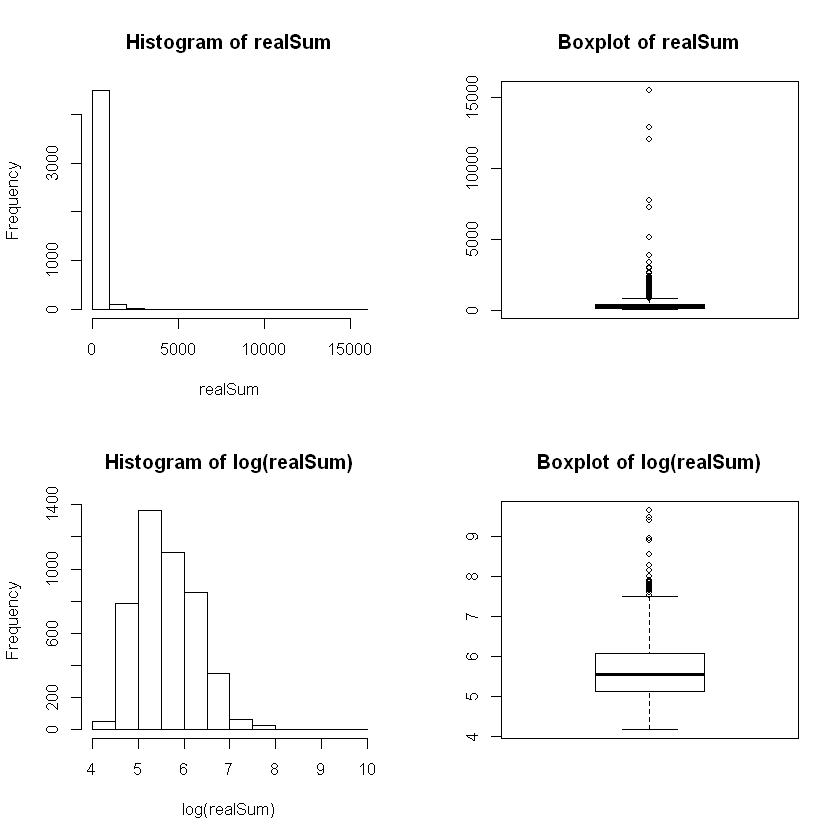

In [296]:
par(mfrow=c(2,2))
hist(data1$realSum, main="Histogram of realSum", xlab="realSum")
boxplot(data1$realSum, main="Boxplot of realSum")
hist(log(data1$realSum), main="Histogram of log(realSum)", xlab="log(realSum)")
boxplot(log(data1$realSum), main="Boxplot of log(realSum)")
# distribution of real sum is highly right skewed, so we applied a log transformation to the vairable. However there still appears
# to be some outliers even after the log transformation as seen from the boxplot of log(realSum)

### 2.1.2 Removal of Outliers with respect to realSum using the interquartile method

In [297]:
data1 <- remove_outlier(data1, c("realSum"),log=T)

### 2.1.3 Summary statistics for realSum with outliers removed

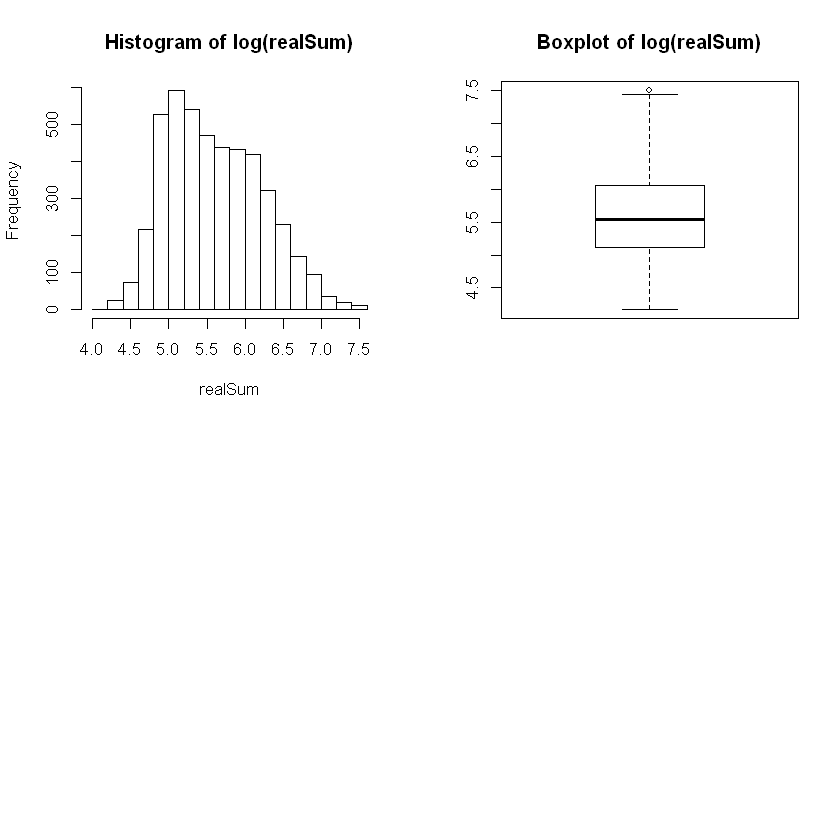

In [298]:
par(mfrow=c(2,2))
hist(log(data1$realSum), main="Histogram of log(realSum)", xlab="realSum")
boxplot(log(data1$realSum), main="Boxplot of log(realSum)")

In [299]:
summary(data1$realSum)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.68  166.75  253.30  333.11  427.57 1811.90 

## 2.2 guest_satisfaction_overall

### 2.2.1 Summary Statistics for guest_satisfaction_overall

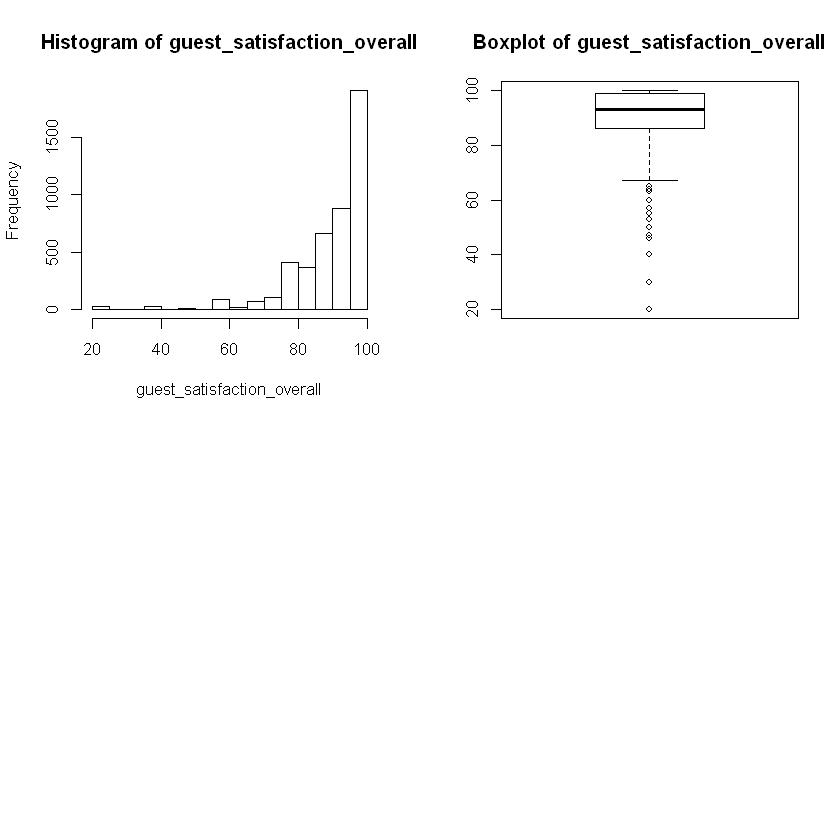

In [300]:
par(mfrow=c(2,2))
hist(data1$guest_satisfaction_overall, main="Histogram of guest_satisfaction_overall", xlab="guest_satisfaction_overall")
boxplot(data1$guest_satisfaction_overall, main="Boxplot of guest_satisfaction_overall")
# distribution of guest_satisfaction_overall is highly left skewed (idk whether we should normalize this)

### 2.2.2 Removal of Outliers with respect to realSum using the interquartile method

In [301]:
data1 <- remove_outlier(data1, c("guest_satisfaction_overall"))

### 2.2.3 Summary statistics for guest_satisfaction_overall with outliers removed

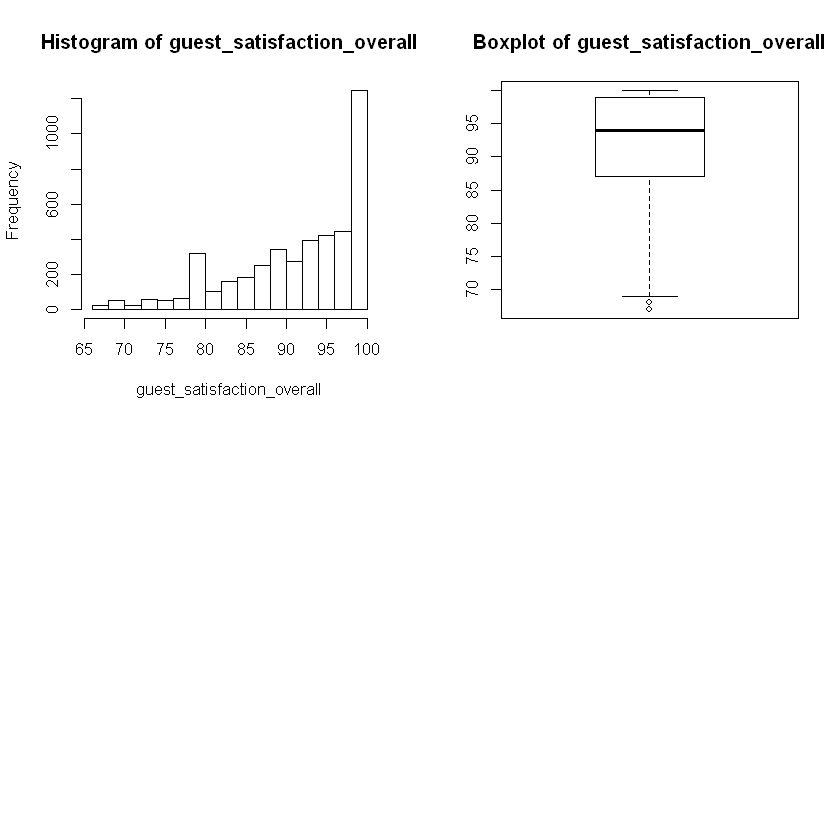

In [302]:
par(mfrow=c(2,2))
hist(data1$guest_satisfaction_overall, main="Histogram of guest_satisfaction_overall", xlab="guest_satisfaction_overall")
boxplot(data1$guest_satisfaction_overall, main="Boxplot of guest_satisfaction_overall")

In [303]:
summary(data1$guest_satisfaction_overall)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  67.00   87.00   94.00   91.94   99.00  100.00 

# 3 Description And Cleaning of Dataset For Other Variables (Numeric)
In this section, we shall look at some other numeric variables of interest. Each variable is investigated
individually to look for possible outliers, and/or to perform a transformation to avoid highly
skewed data.

## 3.1 dist (distance from city centre)

### 3.1.1 Summary Statistics for dist

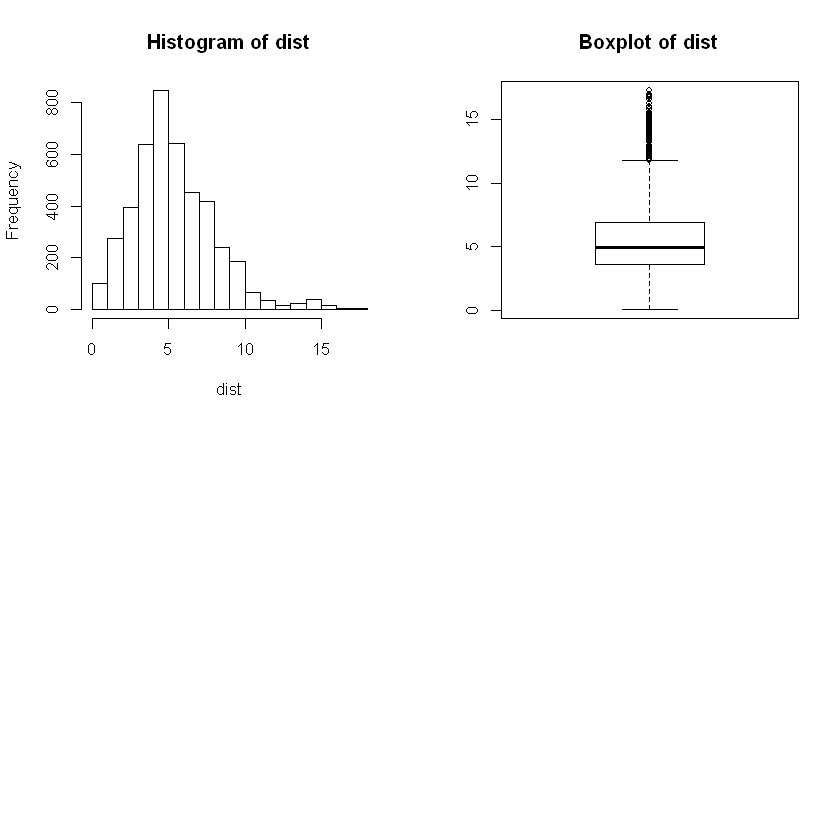

In [304]:
par(mfrow=c(2,2))
hist(data1$dist, main="Histogram of dist", xlab="dist")
boxplot(data1$dist, main="Boxplot of dist")
# looks pretty normal

## 3.1.2 Removal of Outliers with respect to realSum using the interquartile method

In [305]:
data1 <- remove_outlier(data1, c("dist"))

### 3.1.3 Summary statistics for dist with outliers removed

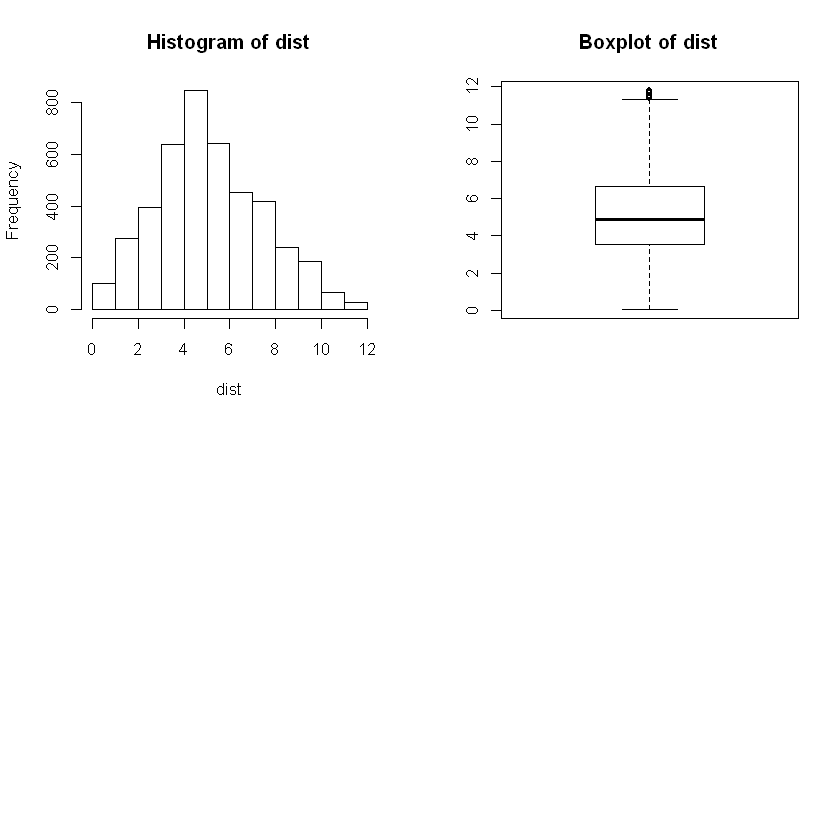

In [306]:
par(mfrow=c(2,2))
hist(data1$dist, main="Histogram of dist", xlab="dist")
boxplot(data1$dist, main="Boxplot of dist")

## 3.2 metro_dist (distance from nearest metro station)

### 3.2.1 Summary Statistics for metro_dist

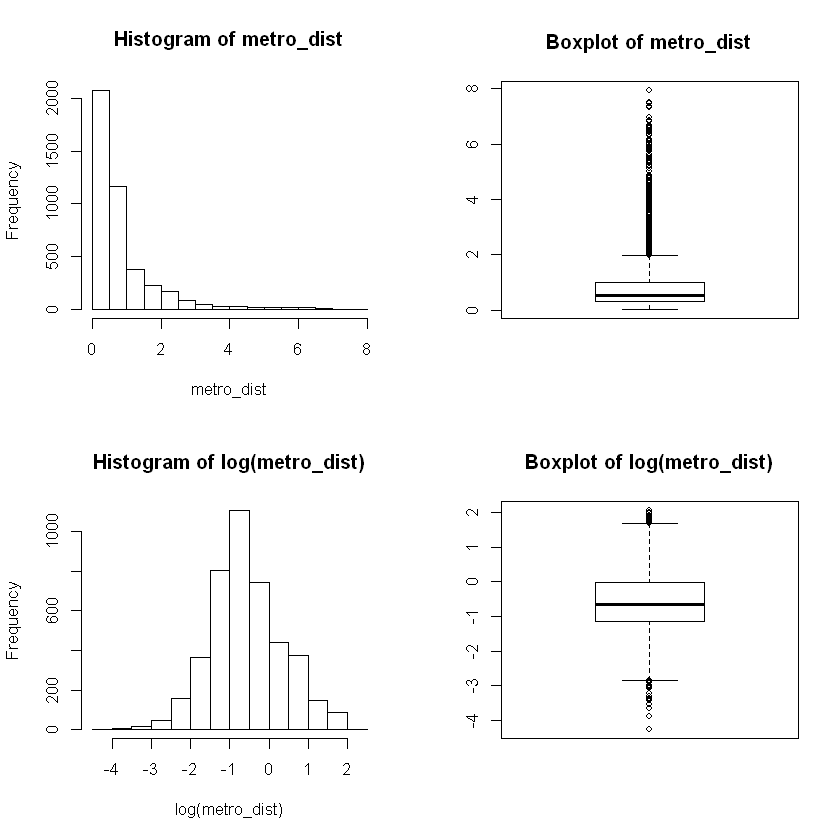

In [284]:
par(mfrow=c(2,2))
hist(data1$metro_dist, main="Histogram of metro_dist", xlab="metro_dist")
boxplot(data1$metro_dist, main="Boxplot of metro_dist")
hist(log(data1$metro_dist), main="Histogram of log(metro_dist)", xlab="log(metro_dist)")
boxplot(log(data1$metro_dist), main="Boxplot of log(metro_dist)")
# normalize with log transform

### 3.2.2 Removal of Outliers with respect to metro_dist using the interquartile method

In [285]:
data1 <- remove_outlier(data1, c("metro_dist"), log=T)

### 3.2.3 Summary statistics for metro_dist with outliers removed

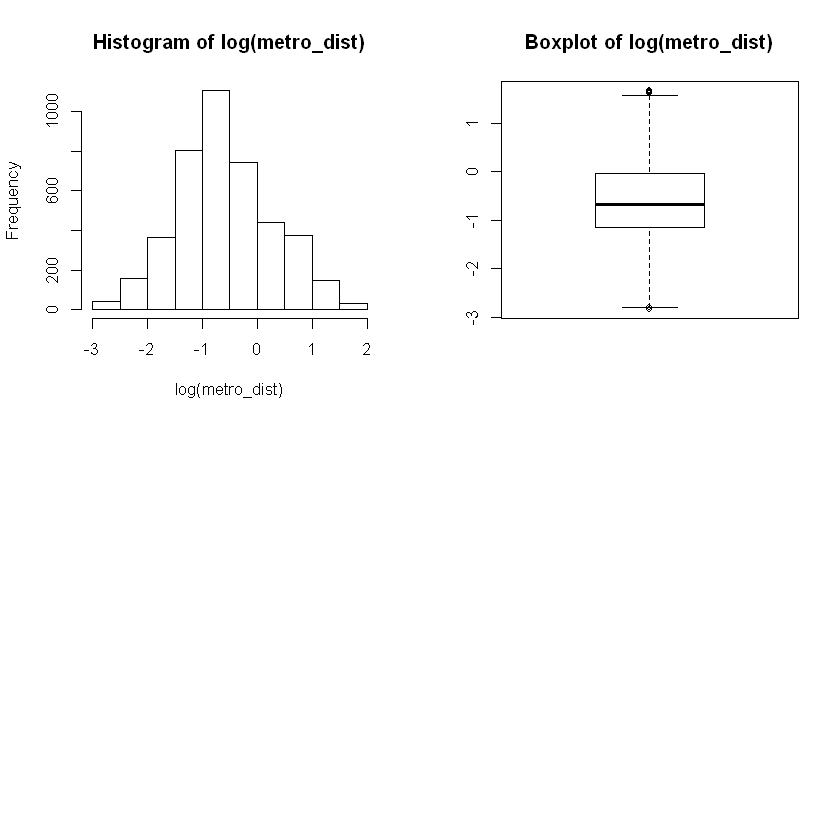

In [286]:
par(mfrow=c(2,2))
hist(log(data1$metro_dist), main="Histogram of log(metro_dist)", xlab="log(metro_dist)")
boxplot(log(data1$metro_dist), main="Boxplot of log(metro_dist)")

# 4 Description And Cleaning of Dataset For Other Variables (Categorical)
In this section, we shall look at some other Categorical variables of interest.

## 4.1 Sumamry statistics of some categorical variables

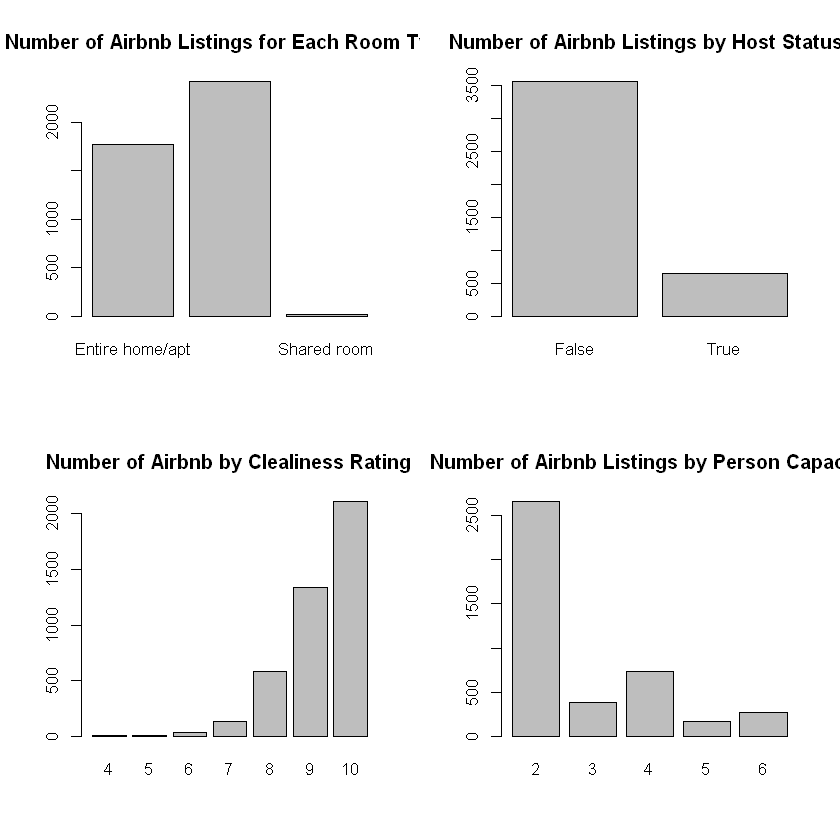

In [287]:
par(mfrow=c(2,2))
barplot(table(data1$room_type), main="Number of Airbnb Listings for Each Room Type")
barplot(table(data1$host_is_superhost), main="Number of Airbnb Listings by Host Status ")
barplot(table(data1$cleanliness_rating), main="Number of Airbnb by Clealiness Rating")
barplot(table(data1$person_capacity), main="Number of Airbnb Listings by Person Capacity")

# 5 Creating Final Dataset for Analysis
Redundant columns that have not been chosen above will be removed from the dataset. Log transformation will be applied to realSum and metro_dist and two new columns log_real_sum and log_metro_sum will be also be added to the dataset to facilitate analysis. redundant columns that have not been chosen above will 

In [308]:
data1["log_real_sum"] <- log(data1$realSum)
data1["log_metro_dist"] <- log(data1$metro_dist)
data1 <- subset(data1, select = c("log_real_sum", "guest_satisfaction_overall", "dist", "log_metro_dist", "room_type", "host_is_superhost", "cleanliness_rating", "person_capacity"))

In [309]:
data1

,log_real_sum,guest_satisfaction_overall,dist,log_metro_dist,room_type,host_is_superhost,cleanliness_rating,person_capacity
1,6.345808,98,5.301018,0.46309882,Entire home/apt,False,10,2
2,5.697041,99,2.198946,-0.96952798,Private room,True,10,2
3,5.819461,96,2.322958,-0.79147115,Private room,False,10,2
4,5.423725,99,5.707825,0.54463390,Private room,True,10,2
5,5.546567,98,3.257945,-0.19186635,Private room,False,9,3
6,5.480192,100,5.085730,0.59123521,Private room,False,10,2
7,5.781023,100,4.595055,-1.21443171,Private room,False,10,2
8,5.047900,95,5.102453,0.01361301,Private room,False,10,2
9,4.862552,93,4.534041,0.57256366,Private room,False,9,4
10,5.505363,74,3.746655,-0.87334028,Entire home/apt,False,8,3


In [310]:
str(data1)

'data.frame':	4292 obs. of  8 variables:
 $ log_real_sum              : num  6.35 5.7 5.82 5.42 5.55 ...
 $ guest_satisfaction_overall: num  98 99 96 99 98 100 100 95 93 74 ...
 $ dist                      : num  5.3 2.2 2.32 5.71 3.26 ...
 $ log_metro_dist            : num  0.463 -0.97 -0.791 0.545 -0.192 ...
 $ room_type                 : Factor w/ 3 levels "Entire home/apt",..: 1 2 2 2 2 2 2 2 2 1 ...
 $ host_is_superhost         : Factor w/ 2 levels "False","True": 1 2 1 2 1 1 1 1 1 1 ...
 $ cleanliness_rating        : num  10 10 10 10 9 10 10 10 9 8 ...
 $ person_capacity           : num  2 2 2 2 3 2 2 2 4 3 ...


In [311]:
summary(data1)

  log_real_sum   guest_satisfaction_overall      dist         
 Min.   :4.169   Min.   : 67.00             Min.   : 0.04055  
 1st Qu.:5.122   1st Qu.: 87.00             1st Qu.: 3.54499  
 Median :5.545   Median : 94.00             Median : 4.86694  
 Mean   :5.611   Mean   : 91.88             Mean   : 5.10754  
 3rd Qu.:6.056   3rd Qu.: 99.00             3rd Qu.: 6.66725  
 Max.   :7.502   Max.   :100.00             Max.   :11.80162  
 log_metro_dist               room_type    host_is_superhost cleanliness_rating
 Min.   :-4.27558   Entire home/apt:1801   False:3640        Min.   : 4.000    
 1st Qu.:-1.15104   Private room   :2472   True : 652        1st Qu.: 9.000    
 Median :-0.66209   Shared room    :  19                     Median :10.000    
 Mean   :-0.57175                                            Mean   : 9.269    
 3rd Qu.:-0.01753                                            3rd Qu.:10.000    
 Max.   : 2.07231                                            Max.   :10.000    

# 6 Statistical Analysis

In [ ]:
# todo